In [2]:
#import all libraries which is need for EDA Analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import dataset Diwali Sales Data which is in CSV form
#Here in that datasets have some elements are in unicode form so we have to escape it.
df= pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape')

In [5]:
df.shape

(11251, 15)

In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [7]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
#Drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1, inplace= True)

In [12]:
#Check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df['Amount'].sum()

106249132.43

we have two options for handel null data for Amount columns

 1.Drop
 
 2.Replace with mean value
 
We decided to go with step 2 "Replace with mean value"
    

In [14]:
df['Amount'].sum()

106249132.43

In [15]:
mean_amount= df['Amount'].mean()
df['Amount'].fillna(mean_amount, inplace = True)

In [16]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
df['Amount'].sum()

106362575.76029274

In [18]:
#rename column Marital_Status to Shaadi
df.rename(columns= {'Marital_Status': 'Shaadi'}, inplace =True)

In [19]:
#Describe method return description of the data in the DataFrame
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569870
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [20]:
#To describe for specific columns
df[['Age','Shaadi', 'Amount']].describe()

,Age,Shaadi,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,0.420318,9453.610858
std,12.754122,0.493632,5219.569870
min,12.000000,0.000000,188.000000
25%,27.000000,0.000000,5443.500000
50%,33.000000,0.000000,8110.000000
75%,43.000000,1.000000,12671.000000
max,92.000000,1.000000,23952.000000


# Exploratory Data Analysis

# Gender

1. Whats the ratio of gender who shopping for Diwali

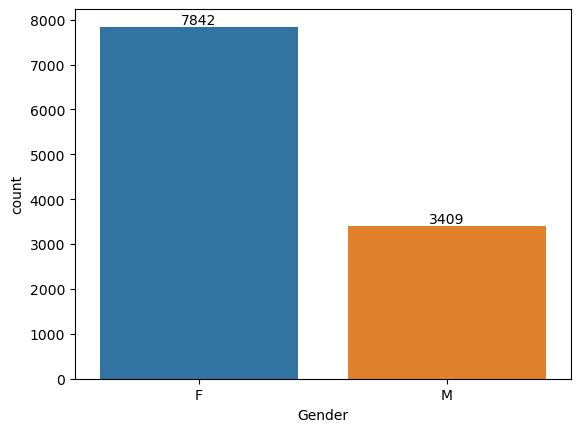

In [22]:
#plotting a bar chart for gender and it's count

ax= sns.countplot(x='Gender',data= df)
for bars in ax.containers:
    ax.bar_label(bars)


In [23]:
count_female_gender= len(df[df['Gender']== 'F']==True)
count_male_gender= len(df[df['Gender']== 'M']==True)
print(count_female_gender)
print(count_male_gender)

7842
3409


In [24]:
#The gender percentage for shopping during Diwali.
shopping_percentage_Female= (count_female_gender/len(df['Gender']))*100
shopping_percentage_Male= 100- shopping_percentage_Female
print("Female percentage for shopping during Diwali is",shopping_percentage_Female, "%")
print("Male percentage for shopping during Diwali is",shopping_percentage_Male ,"%")

Female percentage for shopping during Diwali is 69.70047106923829 %
Male percentage for shopping during Diwali is 30.29952893076171 %


In [25]:
shopping_percentage_Female

69.70047106923829

<Axes: xlabel='Gender', ylabel='Amount'>

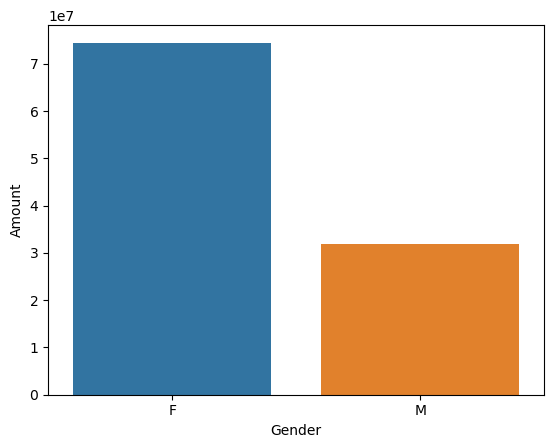

In [26]:
#plotting a bar chart for gender vs total amount
sales_gen= df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are female and even the purchasing power of females are greater than mem

# Age

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [28]:
df['Age Group']

0        26-35
1        26-35
2        26-35
3         0-17
4        26-35
         ...  
11246    18-25
11247    26-35
11248    36-45
11249    36-45
11250    18-25
Name: Age Group, Length: 11251, dtype: object

In [29]:
df['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

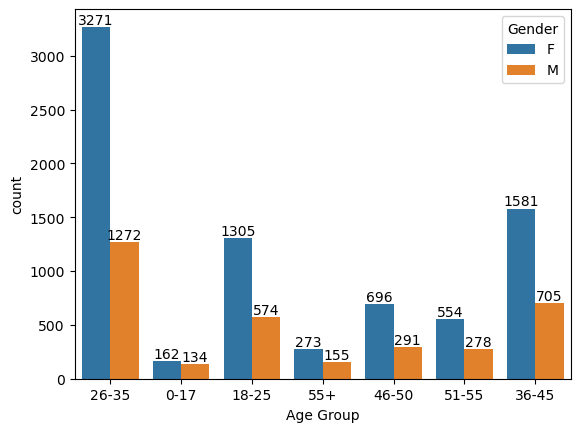

In [30]:
ax=sns. countplot(data= df, x= 'Age Group', hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

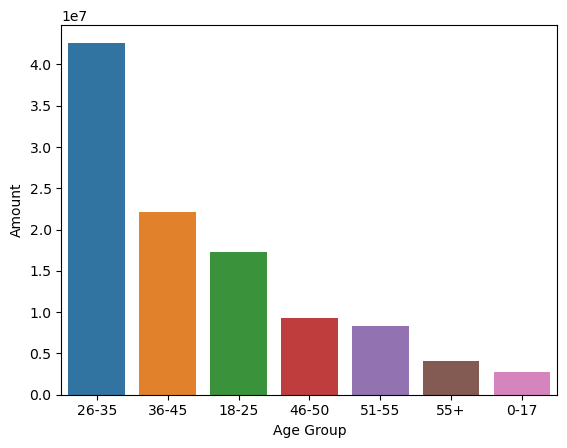

In [31]:
#Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group',y='Amount',data= sales_age)

From the above graphs we can see that most of the buysers arr the age  group between 26-35 yrs 

# State

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

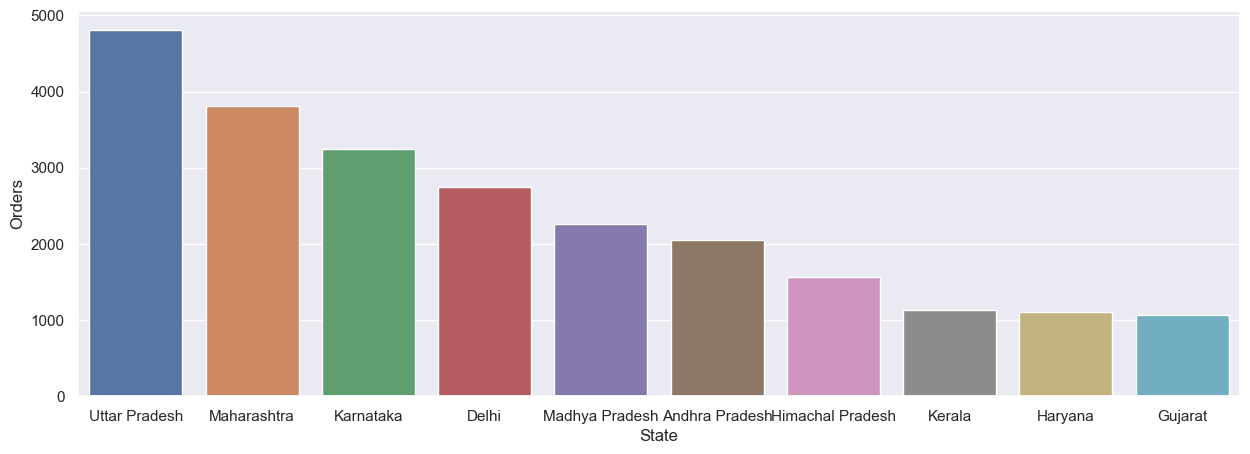

In [33]:
#total number of orders from top 10 stats

sales_state= df.groupby(['State'],as_index= False)['Orders'].sum().sort_values(by='Orders', ascending= False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state, x= 'State', y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

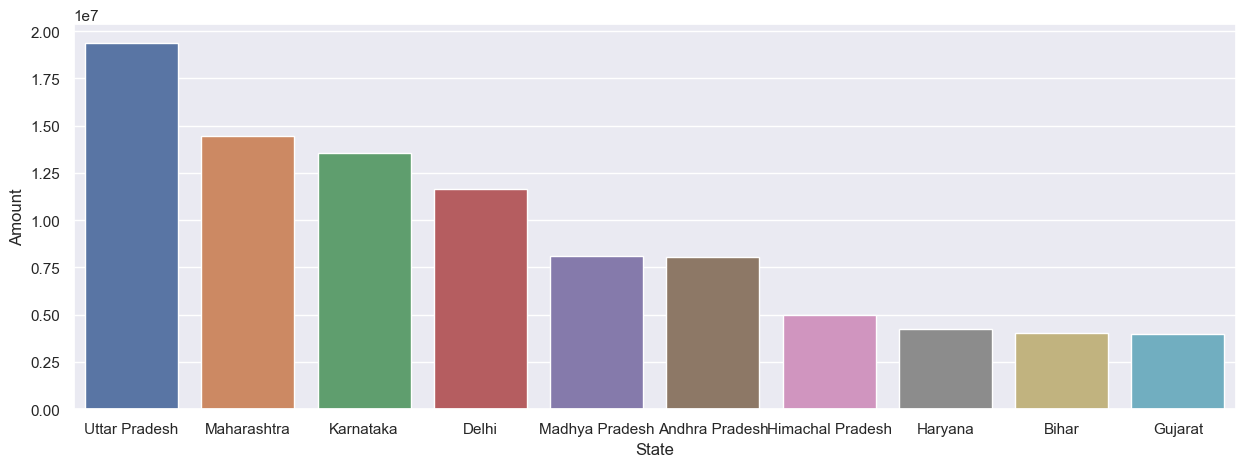

In [34]:
#total amount/sales from top 10 states
sales_state= df.groupby(['State'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= sales_state, x='State',y= 'Amount')

From above graphs we can see that most of the orders & total sales/amount are from 
Uttar Pradesh,Maharastra and Karnataka respectively.

# Marital Status

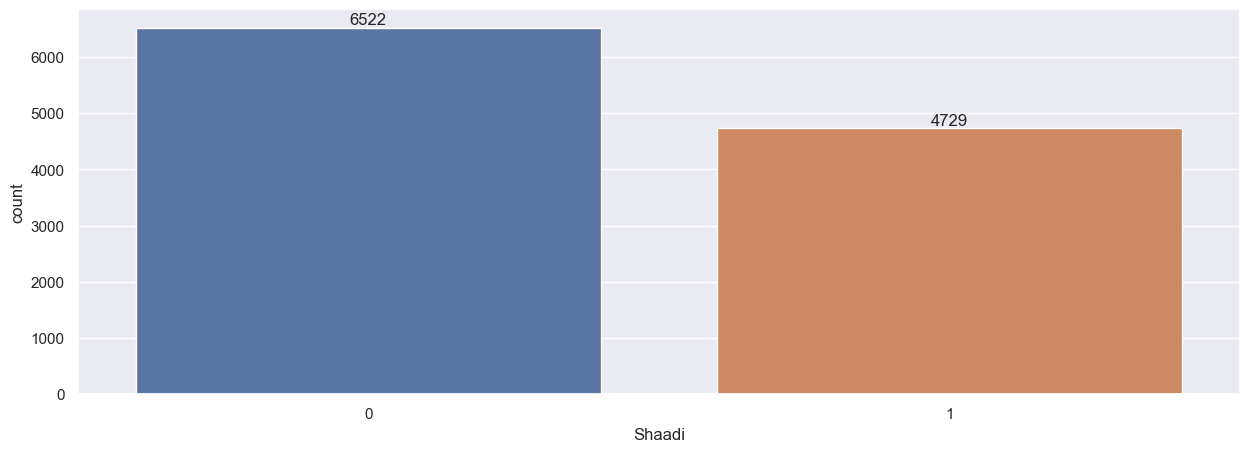

In [35]:
#plots the graph of maritial Status
ax= sns.countplot(data= df, x='Shaadi')
sns.set(rc= {'figure.figsize':(10,7)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Shaadi', ylabel='Amount'>

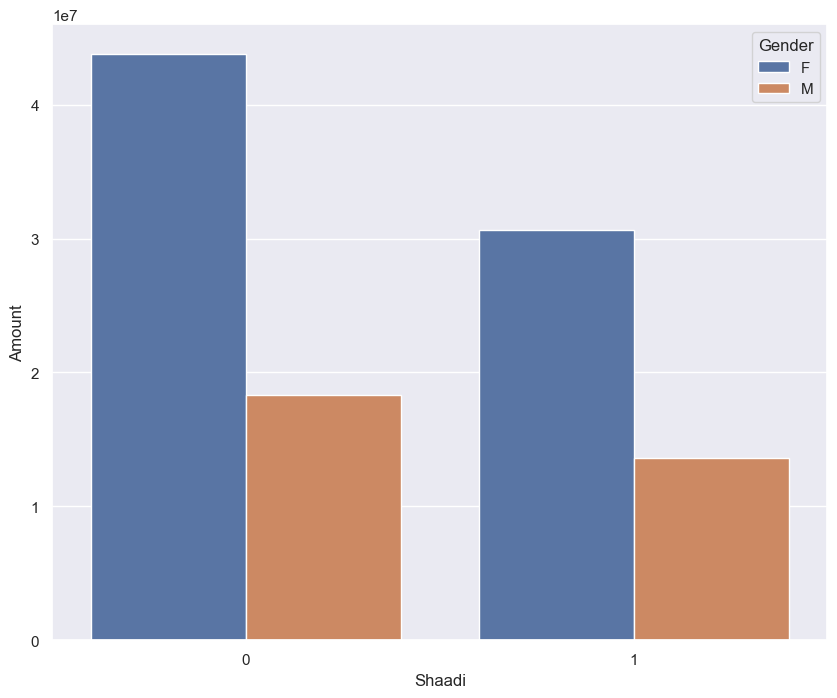

In [36]:
sales_state= df.groupby(['Shaadi','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data= sales_state, x= 'Shaadi', y='Amount', hue= 'Gender')

From above graphs we can see that most of the buyers are married(Women) and they have high purchasing power

# Occupation

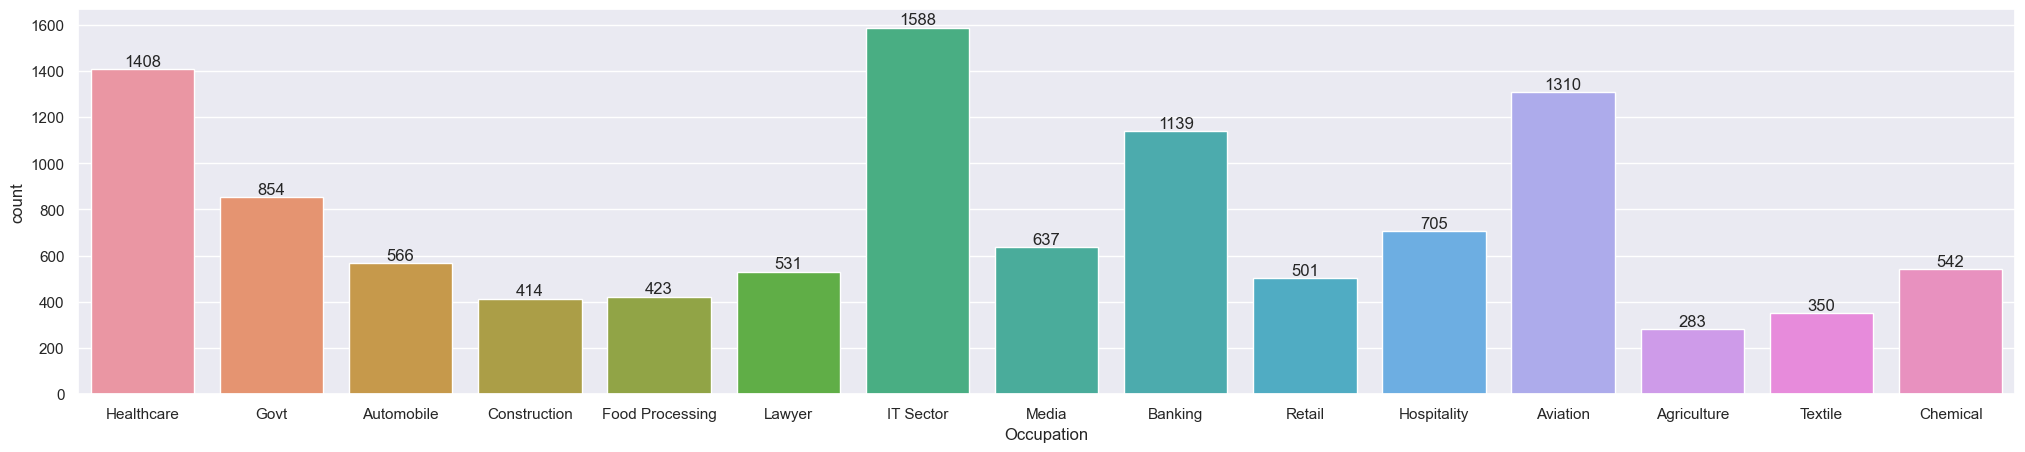

In [37]:
sns.set(rc={'figure.figsize':(25,5)})
ax= sns.countplot(data=df, x= 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

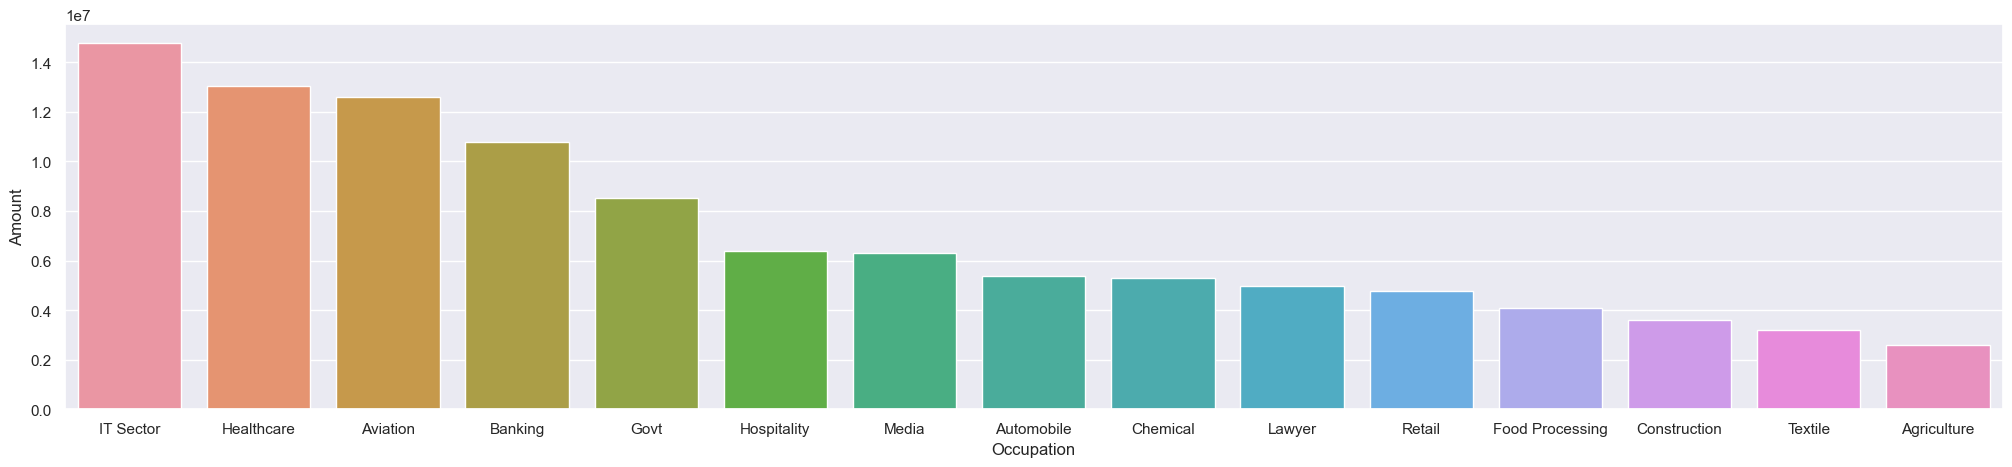

In [38]:
sales_state= df.groupby(['Occupation'],as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state, x= 'Occupation', y='Amount')


From the above grapgs we can see that most of the buyers are working in IT Sector and second most Health Care

# Product Category

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

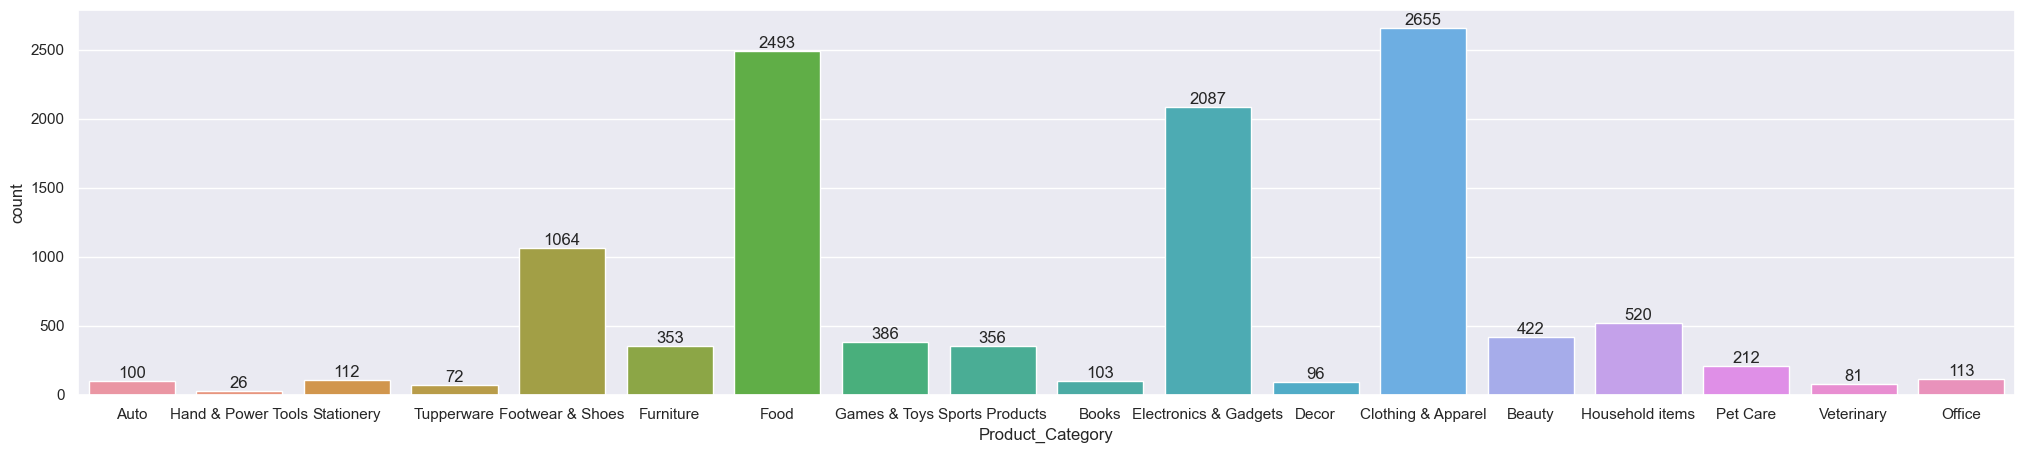

In [40]:
sns.set(rc={'figure.figsize':(25,5)})
ax= sns.countplot(data=df,x='Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

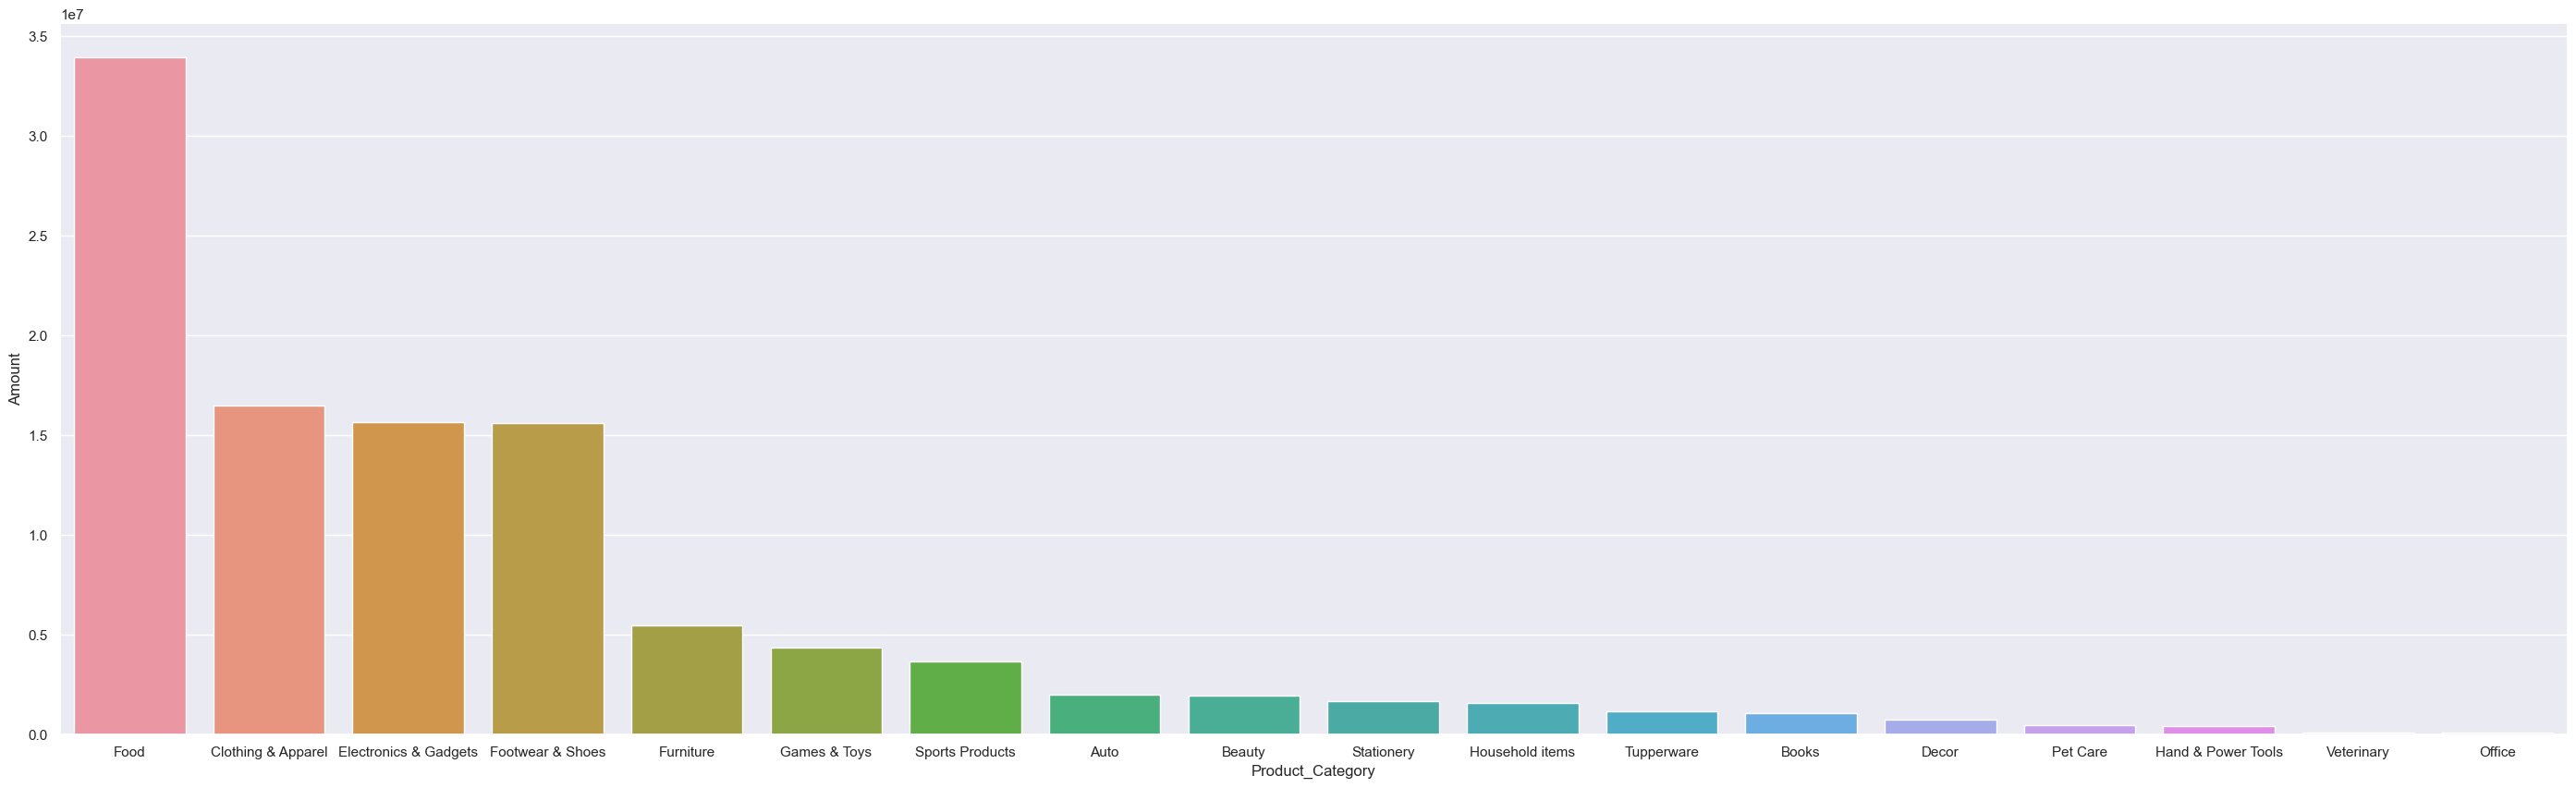

In [45]:
sales_state= df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending= False)
sns.set(rc={'figure.figsize':(35,10)})
sns.barplot(data= sales_state, y='Amount',x='Product_Category')

From above graphs we can see that most of the sold products are for Food, Clothing and Electronic category

<Axes: xlabel='Product_ID', ylabel='Orders'>

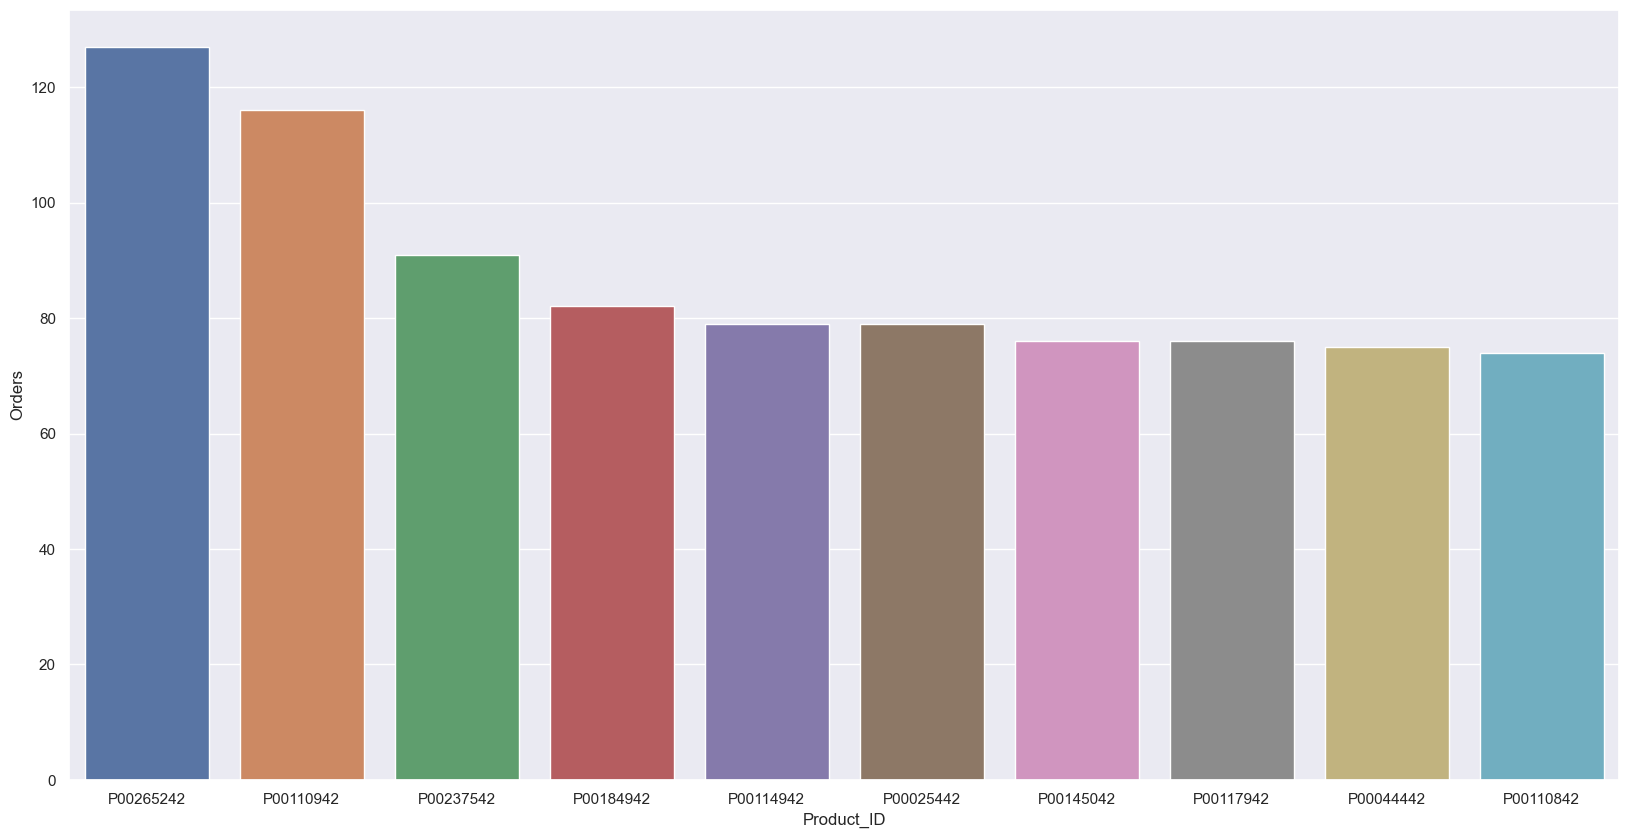

In [52]:
#Top 10 most sold products 
sales_state= df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc= {'figure.figsize':(20,10)})
sns.barplot(data =sales_state, x= 'Product_ID', y='Orders')



# Conclusion:
    

Married women who age group 26-35 yrs from Up,Maharadtra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products
for Food, Clothing and Electronics category
Thank You
